# ATUS Data Preprocessing
The following notebook describes the steps taken to clean and consolidate the three datasets used in this analysis.
***

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Respondent File
atus_resp = pd.read_table('/Users/orenmerberg/Desktop/Data/ATUS/atusresp-0319/atusresp_0319.dat', sep=',')

# Activity Summary File
atus_sum = pd.read_table('/Users/orenmerberg/Desktop/Data/ATUS/atussum-0319/atussum_0319.dat', sep=',')

# Activity File (Note: Add converter to avoid truncation of leading zeros.)
atus_act = pd.read_table('/Users/orenmerberg/Desktop/Data/ATUS/atusact-0319/atusact_0319.dat', sep=',', 
                         converters={col: lambda x: str(x) for col in ['TRCODEP', 'TRTIER1P', 'TRTIER2P']})

In [3]:
print('atus_resp :', "  {:3,} rows x {} columns".format(*atus_resp.shape))
print('atus_sum  :', "  {:3,} rows x {} columns".format(*atus_sum.shape))
print('atus_act  :', "{:3,} rows x  {} columns".format(*atus_act.shape))

atus_resp :   210,586 rows x 132 columns
atus_sum  :   210,586 rows x 455 columns
atus_act  : 4,121,283 rows x  29 columns


Taking a closer look at each file 

In [4]:
atus_resp.describe()

,TUCASEID,TULINENO,TESPUHRS,TRDTIND1,TRDTOCC1,TRERNHLY,TRERNUPD,TRHERNAL,TRHHCHILD,TRIMIND1,...,TRYHHCHILD,TRWBMODR,TRTALONE_WK,TRTCCC_WK,TRLVMODR,TRTEC,TUECYTD,TUELDER,TUELFREQ,TUELNUM
count,2.105860e+05,210586.0,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,...,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000
mean,2.010289e+13,1.0,13.442065,19.042895,6.922070,497.994774,-0.251133,-0.659341,1.551404,6.930114,...,2.820254,-0.659740,191.454973,59.382912,-0.837235,2.941036,-0.774591,0.277526,-0.610368,-0.801473
std,4.918548e+10,0.0,21.446450,19.204672,8.202737,938.200737,0.764833,0.539654,0.497352,7.596953,...,5.529047,0.743485,276.935784,168.934417,0.543412,43.421018,0.764884,1.444009,1.343332,0.700463
min,2.003010e+13,1.0,-4.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-3.000000,-3.000000,-3.000000,-2.000000
25%,2.006050e+13,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.010061e+13,1.0,-1.000000,21.000000,3.000000,-1.000000,0.000000,-1.000000,2.000000,6.000000,...,-1.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
75%,2.014101e+13,1.0,40.000000,40.000000,16.000000,875.000000,0.000000,0.000000,2.000000,15.000000,...,6.000000,-1.000000,325.000000,0.000000,-1.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000
max,2.019121e+13,1.0,99.000000,51.000000,22.000000,9999.000000,1.000000,1.000000,2.000000,21.000000,...,17.000000,1.000000,1440.000000,1440.000000,1.000000,1380.000000,2.000000,2.000000,7.000000,5.000000


In [6]:
atus_sum.describe()

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,t181801,t181899,t189999,t500101,t500103,t500104,t500105,t500106,t500107,t509989
count,2.105860e+05,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,...,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000,210586.000000
mean,2.010289e+13,-0.696357,0.882048,40.320007,1.864084,1.353385,47.519674,2.493613,0.803482,0.584317,...,0.073899,0.018862,1.902567,6.474462,0.670448,0.442408,0.268299,4.062682,0.114490,0.032319
std,4.918548e+10,0.774652,0.841673,2.876836,0.342700,1.057036,17.826802,1.876572,1.428389,1.434198,...,3.910262,1.949870,22.521028,36.809435,9.716821,9.686125,5.116452,19.661665,4.611797,2.433426
min,2.003010e+13,-1.000000,-1.000000,31.000000,1.000000,1.000000,15.000000,1.000000,-1.000000,-3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.006050e+13,-1.000000,1.000000,39.000000,2.000000,1.000000,34.000000,1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.010061e+13,-1.000000,1.000000,40.000000,2.000000,1.000000,46.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.014101e+13,-1.000000,1.000000,43.000000,2.000000,1.000000,61.000000,5.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.019121e+13,3.000000,3.000000,46.000000,2.000000,25.000000,85.000000,5.000000,2.000000,2.000000,...,960.000000,625.000000,1420.000000,1385.000000,825.000000,1155.000000,179.000000,179.000000,565.000000,500.000000


In [7]:
atus_act.describe()

,TUCASEID,TUACTIVITY_N,TUACTDUR24,TUCC5,TUCC5B,TRTCCTOT_LN,TRTCC_LN,TRTCOC_LN,TUCC8,TUCUMDUR,...,TRTONHH_LN,TRTOHH_LN,TRTHH_LN,TRTNOHH_LN,TEWHERE,TUCC7,TRWBELIG,TRTEC_LN,TUEC24,TUDURSTOP
count,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,...,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06,4.121283e+06
mean,2.010223e+13,1.197230e+01,7.357996e+01,6.689982e-01,1.142829e-01,6.040197e+00,5.662692e+00,7.575733e-01,4.888736e+00,6.957297e+02,...,-9.596150e-01,4.541912e+00,4.962332e+00,-5.199332e-01,4.098267e+00,-9.312998e-02,-6.971647e-01,-7.751642e-01,-9.025199e-01,-2.165961e-01
std,4.932327e+10,8.497220e+00,1.001475e+02,7.498292e+00,4.445179e+00,2.609507e+01,2.611321e+01,1.154668e+01,2.118854e+01,3.739806e+02,...,2.190437e+00,2.372223e+01,2.468423e+01,7.644256e+00,7.007204e+00,8.254573e-01,6.894248e-01,5.418079e+00,2.987491e+00,1.101805e+00
min,2.003010e+13,1.000000e+00,1.000000e+00,-3.000000e+00,-3.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-3.000000e+00,1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-3.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-3.000000e+00,-1.000000e+00
25%,2.006040e+13,5.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,3.950000e+02,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
50%,2.010040e+13,1.000000e+01,3.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,6.900000e+02,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
75%,2.014101e+13,1.700000e+01,9.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.360000e+02,...,-1.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,8.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
max,2.019121e+13,9.100000e+01,1.350000e+03,9.700000e+01,9.700000e+01,1.195000e+03,1.195000e+03,1.195000e+03,9.700000e+01,2.700000e+03,...,7.200000e+02,1.195000e+03,1.195000e+03,8.550000e+02,9.900000e+01,9.700000e+01,1.000000e+00,1.097000e+03,9.700000e+01,2.000000e+00


There are a lot of variables (especially `atus_sum`) and the variable names are not straightforward. Luckily, ATUS provides a 
[table](https://www.bls.gov/tus/freqvariables.pdf) of frequently used variables. I decide to only take their suggested variables for now (I can always come back to grab more).  

In [7]:
freq_vars = pd.read_excel('/Users/orenmerberg/Desktop/Data/ATUS/freqvariables.xlsx')

$\left(\text{Activity} \cup \text{Summary} \cup \text{Respondent}\right ) \cap \text{Frequent}$

In [8]:
# Union of columns in all three ATUS datasets.
all_cols = set(atus_act.columns) | set(atus_sum.columns) | set(atus_resp.columns)

# Intersection of all_cols and freq_vars. 
freq_cols = all_cols & set(freq_vars.Variables)

def filter_cols(df):
    """ Outputs new dataframe keeping only columns that are in freq_cols, sets index to TUCASEID. """
    df_new = df.filter(freq_cols)
    df_new['TUCASEID'] = df_new.TUCASEID.astype(str)
    return df_new.set_index('TUCASEID')

In [9]:
df_act = filter_cols(atus_act)
df_sum = filter_cols(atus_sum)
df_res = filter_cols(atus_resp)

print('df_res :', "  {:3,} rows x {} columns".format(*df_res.shape))
print('df_sum :', "  {:3,} rows x {} columns".format(*df_sum.shape))
print('df_act :', "{:3,} rows x  {} columns".format(*df_act.shape))

df_res :   210,586 rows x 43 columns
df_sum :   210,586 rows x 23 columns
df_act : 4,121,283 rows x  9 columns


This is easier to work with.  

Next, I merge `df_sum` and `df_res` on `TUCASEID` because it's one-to-one, but leave `df_act` alone since each `TUCASEID` is repeated for each activity done by a respondent.

In [50]:
# Drop columns from df_sum that are in df_res and merge on TUCASEID.
cols_to_use = df_sum.columns.difference(df_res.columns)
df_res_sum = pd.merge(df_res, df_sum[cols_to_use], how='inner', on='TUCASEID')

In [15]:
print('df_res_sum :', "{:3,} rows x {} columns\n".format(*df_res_sum.shape))
display(df_res_sum.head())

df_res_sum : 210,586 rows x 50 columns



,TROHHCHILD,TRHOLIDAY,TRTHH,TRERNWA,TRWBMODR,TRERNHLY,TRHHCHILD,TUDIARYDATE,TEMJOT,TUELDER,...,TUYEAR,TRSPFTPT,TUDIARYDAY,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TESEX
TUCASEID,,,,,,,,,,,,,,,,,,,,,
20030100013280,2,0,-1,66000,-1,2200.0,2,20030103,2,-1,...,2003,-1,6,1,-1,44,2,2,60,1
20030100013344,1,0,-1,20000,-1,-1.0,1,20030104,2,-1,...,2003,1,7,2,-1,40,2,1,41,2
20030100013352,2,0,-1,20000,-1,1250.0,2,20030104,2,-1,...,2003,-1,7,1,-1,41,2,1,26,2
20030100013848,1,0,-1,-1,-1,-1.0,1,20030102,-1,-1,...,2003,1,5,2,-1,39,2,2,36,2
20030100014165,1,0,-1,-1,-1,-1.0,1,20030109,2,-1,...,2003,-1,5,2,-1,45,2,1,51,1


I would now like to make the data easier to read. The variable names are not very descriptive and each variable takes on numerical values (as opposed to categorical). Luckily, ATUS provides a data dictionary PDF on their website (pictured below).

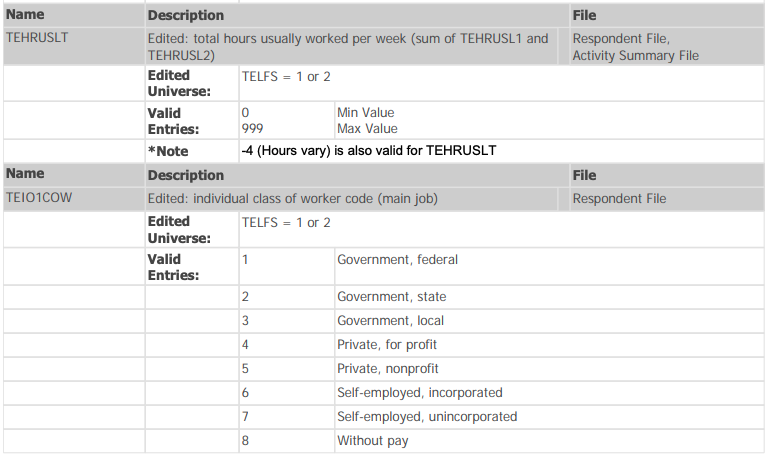  
[Source](https://www.bls.gov/tus/atusintcodebk0319.pdf)

PDF's are generally difficult to parse, but I think it's worth the effort. Python has some modules to deal with PDF's, but I decide to convert it to .csv using Adobe Acrobat and use standard Python modules to clean it up.

In [16]:
atus_codes = pd.read_excel('/Users/orenmerberg/Desktop/Data/ATUS/atusintcodebk19.xlsx', header=None)
atus_codes.head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,Name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,File,NaN,NaN,NaN,NaN,NaN
1,TEABSRSN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Respondent File,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Yikes...

In [17]:
# Handle missing values.
atus_codes = atus_codes.dropna(axis=1, how='all').dropna(axis=0, how='all')
atus_codes[0] = atus_codes[0].fillna(method='ffill')
atus_codes = atus_codes.set_index(0)
atus_codes.head()

,10,16,22,33
0,,,,
Name,Description,NaN,NaN,File
TEABSRSN,Edited: what was the main reason you were abse...,NaN,NaN,Respondent File
TEABSRSN,Edited Universe:,TELFS = 2,NaN,NaN
TEABSRSN,Valid Entries:,1,On layoff (temporary or indefinite),NaN
TEABSRSN,NaN,2,Slack work/business conditions,NaN


This is workable. Now I just need to parse the data to extract a map for the categorical variables. This took some trial and error, so the following function `get_val_map` is quite specifically designed for this exact problem and might not make much sense. 

In [18]:
def get_val_map(df):
    val_map = {}   
    for idx in df.index.unique()[1:]:        
        if len(df.loc[idx].iloc[2:][22]) > 2:        
            if df.loc[idx].iloc[-1][10] == '*Note':
                val_map[idx] = dict(df.loc[idx].iloc[2:][[16,22]].values[:-1])
            else:
                val_map[idx] = dict(df.loc[idx].iloc[2:][[16,22]].values)           
    return val_map

val_map = get_val_map(atus_codes)

In [19]:
# Print example.
val_map['TEIO1COW']

{1: 'Government, federal',
 2: 'Government, state',
 3: 'Government, local',
 4: 'Private, for profit',
 5: 'Private, nonprofit',
 6: 'Self-employed, incorporated',
 7: 'Self-employed, unincorporated',
 8: 'Without pay'}

Applying `val_map` to the data...

In [51]:
def map_columns(df):
    """ Decode variables with previously defined val_map. """
    for col in df.columns:
        if col in val_map.keys():
            df[col] = df[col].map(val_map[col])
    # Additional definitions provided by ATUS.
    df = df.replace({-1: np.nan, -2: "Unsure", -3: "Refused"})
    return df

df_res_sum = map_columns(df_res_sum)
df_act = map_columns(df_act)

In [52]:
df_res_sum.head()

,TROHHCHILD,TRHOLIDAY,TRTHH,TRERNWA,TRWBMODR,TRERNHLY,TRHHCHILD,TUDIARYDATE,TEMJOT,TUELDER,...,TUYEAR,TRSPFTPT,TUDIARYDAY,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TESEX
TUCASEID,,,,,,,,,,,,,,,,,,,,,
20030100013280,2.0,Diary day was not a holiday,NaN,66000.0,NaN,2200.0,2.0,20030103.0,2.0,NaN,...,2003.0,NaN,Friday,1.0,NaN,44.0,2.0,2.0,60.0,1.0
20030100013344,1.0,Diary day was not a holiday,NaN,20000.0,NaN,NaN,1.0,20030104.0,2.0,NaN,...,2003.0,Full time,Saturday,2.0,NaN,40.0,2.0,1.0,41.0,2.0
20030100013352,2.0,Diary day was not a holiday,NaN,20000.0,NaN,1250.0,2.0,20030104.0,2.0,NaN,...,2003.0,NaN,Saturday,1.0,NaN,41.0,2.0,1.0,26.0,2.0
20030100013848,1.0,Diary day was not a holiday,NaN,NaN,NaN,NaN,1.0,20030102.0,NaN,NaN,...,2003.0,Full time,Thursday,2.0,NaN,39.0,2.0,2.0,36.0,2.0
20030100014165,1.0,Diary day was not a holiday,NaN,NaN,NaN,NaN,1.0,20030109.0,2.0,NaN,...,2003.0,NaN,Thursday,2.0,NaN,45.0,2.0,1.0,51.0,1.0


In [23]:
df_act.head()

,TRCODEP,TEWHERE,TRTIER2P,TRTHH_LN,TUACTDUR24,TRTIER1P,TUSTOPTIME,TRTEC_LN,TUSTARTTIM
TUCASEID,,,,,,,,,
20030100013280,130124,Outdoors away from home,1301,NaN,60.0,13,05:00:00,NaN,04:00:00
20030100013280,010201,NaN,0102,NaN,30.0,01,05:30:00,NaN,05:00:00
20030100013280,010101,NaN,0101,NaN,600.0,01,15:30:00,NaN,05:30:00
20030100013280,120303,Respondent's home or yard,1203,NaN,150.0,12,18:00:00,NaN,15:30:00
20030100013280,110101,Respondent's home or yard,1101,NaN,5.0,11,18:05:00,NaN,18:00:00


Some variables were missed. `TRCODEP`, `TRTIER2P`, and `TRTIER2P` in the Activity File have a separate coding lexicon provided by ATUS. I followed a similar process as before to map these variables. For any additional categorical variables that are missed, I will manually search them on ATUS's site. 

In [24]:
lex = pd.read_excel('/Users/orenmerberg/Desktop/Data/ATUS/lexiconnoex0319.xlsx', converters={'Code': lambda x: str(x)})
lex.head()

,Category,Sub Category,Code,Activity,Notes
0,01 Personal Care Activities,NaN,NaN,NaN,NaN
1,NaN,0101 Sleeping,NaN,NaN,NaN
2,NaN,NaN,010101,Sleeping,NaN
3,NaN,NaN,010102,Sleeplessness,NaN
4,NaN,NaN,010199,"Sleeping, n.e.c.*",NaN


In [25]:
# Fill missing values
lex[['Category', 'Sub Category']] = lex[['Category', 'Sub Category']].fillna(method='ffill')
lex = lex.dropna(subset=['Code'])

# Extract (code, description) pairs for the three activity variables.
tier1 = lex['Category'].drop_duplicates()
tier1_map = dict(zip(tier1.str[:2], tier1.str[2:].str.strip()))

tier2 = lex['Sub Category'].drop_duplicates()
tier2_map = dict(zip(tier2.str[:4], tier2.str[4:].str.strip()))

tier3_map = dict(zip(lex['Code'], lex['Activity']))

In [26]:
# Map values in activity dataset.
df_act['TRTIER1P'] = df_act['TRTIER1P'].map(tier1_map)
df_act['TRTIER2P'] = df_act['TRTIER2P'].map(tier2_map)
df_act['TRCODEP'] = df_act['TRCODEP'].map(tier3_map)

In [27]:
df_act.head()

,TRCODEP,TEWHERE,TRTIER2P,TRTHH_LN,TUACTDUR24,TRTIER1P,TUSTOPTIME,TRTEC_LN,TUSTARTTIM
TUCASEID,,,,,,,,,
20030100013280,Running,Outdoors away from home,"Participating in Sports, Exercise, and Recreation",NaN,60.0,"Sports, Exercise, & Recreation",05:00:00,NaN,04:00:00
20030100013280,"Washing, dressing and grooming oneself",NaN,Grooming,NaN,30.0,Personal Care Activities,05:30:00,NaN,05:00:00
20030100013280,Sleeping,NaN,Sleeping,NaN,600.0,Personal Care Activities,15:30:00,NaN,05:30:00
20030100013280,Television and movies (not religious),Respondent's home or yard,Relaxing and Leisure,NaN,150.0,"Socializing, Relaxing, and Leisure",18:00:00,NaN,15:30:00
20030100013280,Eating and drinking,Respondent's home or yard,Eating and Drinking,NaN,5.0,Eating and Drinking,18:05:00,NaN,18:00:00


In [58]:
df_res_sum.loc[:, ['TROHHCHILD', 'TEMJOT', 'TESCHENR', 'TRNHHCHILD']].replace({1:'Yes', 2:'No'}, inplace=True)

df_res_sum['TESPEMPNOT'].replace({1:'Employed', 2:'Unemployed'}, inplace=True)

df_res_sum['TRDPFTPT'].replace({1:'Full Time', 2:'Part Time'}, inplace=True)

df_res_sum['TEERNHRY'].replace({1:'Hourly', 2:'Not Hourly'}, inplace=True)

df_res_sum['GEMETSTA'].replace({1:'Metropolitan', 2:'Non-metropolitan', 3:'Not Identified'}, inplace=True)

df_res_sum['PEHSPNON'].replace({1:'Hispanic', 2:'Not Hispanic'}, inplace=True)

df_res_sum['TESEX'].replace({1:'Male', 2:'Female'}, inplace=True)

df_res_sum['PEEDUCA'].replace({ 31: 'Less than 1st grade',
                                32: '1st, 2nd, 3rd, or 4th grade',
                                33: '5th or 6th grade',
                                34: '7th or 8th grade',
                                35: '9th grade',
                                36: '10th grade',
                                37: '11th grade',
                                38: '12th grade - no diploma',
                                39: 'High school graduate - diploma or equivalent (GED)',
                                40: 'Some college but no degree',
                                41: 'Associate degree - occupational/vocational',
                                42: 'Associate degree - academic program',
                                43: "Bachelor's degree (BA, AB, BS, etc.)",
                                44: "Master's degree (MA, MS, MEng, MEd, MSW, etc.)",
                                45: 'Professional school degree (MD, DDS, DVM, etc.)',
                                46: 'Doctoral degree (PhD, EdD, etc.)'},
                              inplace=True)

df_res_sum['PTDTRACE'].replace({1: 'Asian Indian',
                                2: 'Chinese',
                                3: 'Filipino',
                                4: 'Japanese',
                                5: 'Korean',
                                6: 'Vietnamese',
                                7: 'Other'},
                               inplace=True)

Lastly, I rename the columns to make things easier.

In [45]:
new_cols = { 'TEERNHRY': 'job_paid_hourly',
             'TEHRUSL1': 'weekly_work_hrs_main',
             'TEHRUSL2': 'weekly_work_hrs_other',
             'TEIO1COW': 'worker_class',
             'TEIO1ICD': 'employment_industry1',
             'TEIO1OCD': 'occupation1',
             'TESCHFT': 'school_enrollment_type',
             'TESPUHRS': 'spouse_work_hrs',
             'TRDTIND1': 'employment_industry2',
             'TRDTOCC1': 'occupation2',
             'TREMODR': 'eat_health_module',
             'TRERNHLY': 'hourly_earnings',
             'TRHHCHILD': 'child_lt18_present',
             'TRIMIND1': 'employment_industry3',
             'TRLVMODR': 'leave_module',
             'TRMJIND1': 'employment_industry4',
             'TRMJOCC1': 'occupation3',
             'TRMJOCGR': 'occupation4',
             'TRNHHCHILD': 'nonhousehold_child_lt18',
             'TROHHCHILD': 'household_child_lt18',
             'TRTEC': 'diary_time_eldercare',
             'TRTHH': 'diary_time_childcare2',
             'TRWBMODR': 'wellbeing_module',
             'TUDIARYDATE': 'date',
             'TUECYTD': 'eldercare_yesterday',
             'TUELDER': 'eldercare_prev_months',
             'TUMONTH': 'month',
             'TUFNWGTP': 'weight',
             'TRSPPRES': 'spouse_present',
             'TRSPFTPT': 'spouse_employment_type',
             'TESCHENR': 'school_enrollment',
             'TESCHLVL': 'school_level',
             'TUSTARTTIM': 'activity_start',
             'TUSTOPTIME': 'activity_stop',
             'TUACTDUR24': 'activity_duration',
             'TRTHH_LN': 'activity_time_childcare',
             'TEWHERE': 'activity_location',
             'TRTEC_LN': 'activity_time_eldercare',
             'TRTIER2P': 'activity_category_ter',
             'TRCODEP': 'activity_category_prim',
             'TRTIER1P': 'activity_category_sec',
             'TEHRUSLT': 'weekly_work_hours',
             'PTDTRACE': 'race',
             'TRDPFTPT': 'employment_type',
             'TUYEAR': 'year',
             'TRCHILDNUM': 'num_child_lt18',
             'TEAGE': 'age',
             'PEHSPNON': 'hispanic_origin',
             'PEEDUCA': 'education',
             'TRHOLIDAY': 'holiday',
             'TUDIARYDAY': 'day',
             'TRERNWA': 'weekly_earnings',
             'TEMJOT': 'multiple_job_status',
             'TESEX': 'gender',
             'TESPEMPNOT': 'spouse_employment_status',
             'TELFS': 'labor_status',
             'TRYHHCHILD': 'age_youngest_child',
             'GTMETSTA': 'metropolitan1',
             'GEMETSTA': 'metropolitan2' 
           }

In [59]:
df_res_sum = df_res_sum.rename(columns=new_cols)
df_act = df_act.rename(columns=new_cols)

In [67]:
df_res_sum.head()

,household_child_lt18,holiday,diary_time_childcare2,weekly_earnings,wellbeing_module,hourly_earnings,child_lt18_present,date,multiple_job_status,eldercare_prev_months,...,year,spouse_employment_type,day,metropolitan2,metropolitan1,education,hispanic_origin,race,age,gender
TUCASEID,,,,,,,,,,,,,,,,,,,,,
20030100013280,No,Diary day was not a holiday,NaN,66000.0,NaN,2200.0,No,20030103.0,No,NaN,...,2003.0,NaN,Friday,Metropolitan,NaN,"Master's degree (MA, MS, MEng, MEd, MSW, etc.)",Not Hispanic,Chinese,60.0,Male
20030100013344,Yes,Diary day was not a holiday,NaN,20000.0,NaN,NaN,Yes,20030104.0,No,NaN,...,2003.0,Full time,Saturday,Non-metropolitan,NaN,Some college but no degree,Not Hispanic,Asian Indian,41.0,Female
20030100013352,No,Diary day was not a holiday,NaN,20000.0,NaN,1250.0,No,20030104.0,No,NaN,...,2003.0,NaN,Saturday,Metropolitan,NaN,Associate degree - occupational/vocational,Not Hispanic,Asian Indian,26.0,Female
20030100013848,Yes,Diary day was not a holiday,NaN,NaN,NaN,NaN,Yes,20030102.0,NaN,NaN,...,2003.0,Full time,Thursday,Non-metropolitan,NaN,High school graduate - diploma or equivalent (...,Not Hispanic,Chinese,36.0,Female
20030100014165,Yes,Diary day was not a holiday,NaN,NaN,NaN,NaN,Yes,20030109.0,No,NaN,...,2003.0,NaN,Thursday,Non-metropolitan,NaN,"Professional school degree (MD, DDS, DVM, etc.)",Not Hispanic,Asian Indian,51.0,Male


In [68]:
df_act.head()

,activity_category_prim,activity_location,activity_category_ter,activity_time_childcare,activity_duration,activity_category_sec,activity_stop,activity_time_eldercare,activity_start
TUCASEID,,,,,,,,,
20030100013280,Running,Outdoors away from home,"Participating in Sports, Exercise, and Recreation",NaN,60.0,"Sports, Exercise, & Recreation",05:00:00,NaN,04:00:00
20030100013280,"Washing, dressing and grooming oneself",NaN,Grooming,NaN,30.0,Personal Care Activities,05:30:00,NaN,05:00:00
20030100013280,Sleeping,NaN,Sleeping,NaN,600.0,Personal Care Activities,15:30:00,NaN,05:30:00
20030100013280,Television and movies (not religious),Respondent's home or yard,Relaxing and Leisure,NaN,150.0,"Socializing, Relaxing, and Leisure",18:00:00,NaN,15:30:00
20030100013280,Eating and drinking,Respondent's home or yard,Eating and Drinking,NaN,5.0,Eating and Drinking,18:05:00,NaN,18:00:00
